c:\Users\learr\OneDrive - uap.edu.ar\Ing. en sistemas\4. Cuarto año\Primer Cuatrimestre\Inteligencia Artificial\ML\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:06:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Resultados de Random Forest ===
Precisión: 0.9
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320


=== Resultados de XGBoost ===
Precisión: 0.903125
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.70      0.60      0.64        47

    accuracy                           0.90       320
   macro avg       0.82      0.78      0.79       320
weighted avg       0.90      0.90      0.90       320



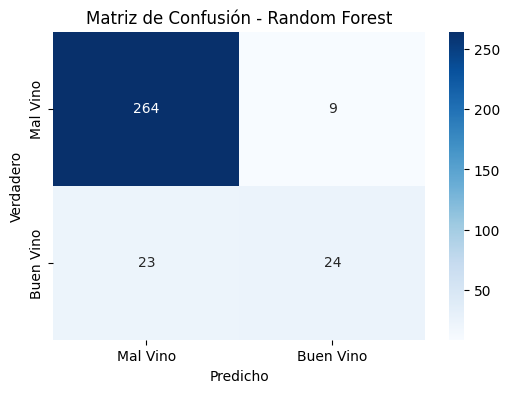

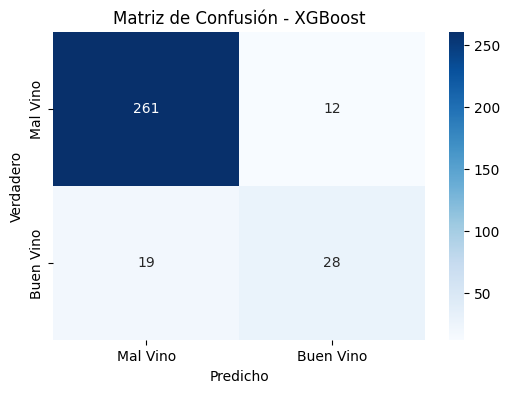

In [7]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el conjunto de datos Wine Quality
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Separar características (X) y etiquetas (y)
X = data.drop('quality', axis=1)  # Todas las columnas excepto 'quality'
y = data['quality']  # Etiqueta: calidad del vino

# Opcional: Convertir la tarea en binaria (buen vino vs mal vino)
# Clasificamos como "buen vino" si la calidad es >= 7, y "mal vino" si es < 7
y = y.apply(lambda x: 1 if x >= 7 else 0)

# 2. Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Entrenar un modelo de XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 5. Hacer predicciones con ambos modelos
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# 6. Evaluar el rendimiento de ambos modelos
print("=== Resultados de Random Forest ===")
print("Precisión:", accuracy_score(y_test, rf_predictions))
print("Informe de Clasificación:\n", classification_report(y_test, rf_predictions))

print("\n=== Resultados de XGBoost ===")
print("Precisión:", accuracy_score(y_test, xgb_predictions))
print("Informe de Clasificación:\n", classification_report(y_test, xgb_predictions))

# 7. Visualizar matrices de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Mal Vino', 'Buen Vino'], yticklabels=['Mal Vino', 'Buen Vino'])
    plt.title(title)
    plt.ylabel('Verdadero')
    plt.xlabel('Predicho')
    plt.show()

plot_confusion_matrix(y_test, rf_predictions, "Matriz de Confusión - Random Forest")
plot_confusion_matrix(y_test, xgb_predictions, "Matriz de Confusión - XGBoost")